In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_smd(a1, a2):

    mean_diff = np.mean(a1 - a2, axis=0)
    std_diff = np.std(a1 - a2, axis=0, ddof=1)
    smd = mean_diff / std_diff  # Cohen's d for each column

    smd_df = pd.DataFrame(smd, index=[f'Indicator {i+1}' for i in range(a1.shape[1])], columns=['SMD'])
    
    return smd_df

def compute_drd(a1, a2):
    
    drd = (a1 - a2) / np.maximum(a1, a2)  # Element-wise operation
    
    drd_df = pd.DataFrame(drd, columns=[f'Indicator {i+1}' for i in range(a1.shape[1])])
    
    return drd_df

In [ ]:
def plot_drd(drd_df):
    plt.figure(figsize=(10, 5))
    drd_df.boxplot(grid=False)
    plt.axhline(y=0, color='orange', linestyle='--', label='Reference Line (0)')
    plt.ylabel('DRD Value')
    plt.xlabel('Indicators')
    plt.title('Distribution of Relative Differences (DRD)')
    plt.legend()
    plt.show()

Standardized Mean Difference (SMD):


,SMD
Indicator 1,0.060843
Indicator 2,0.047580
Indicator 3,0.037534
Indicator 4,0.064159
Indicator 5,-0.009131


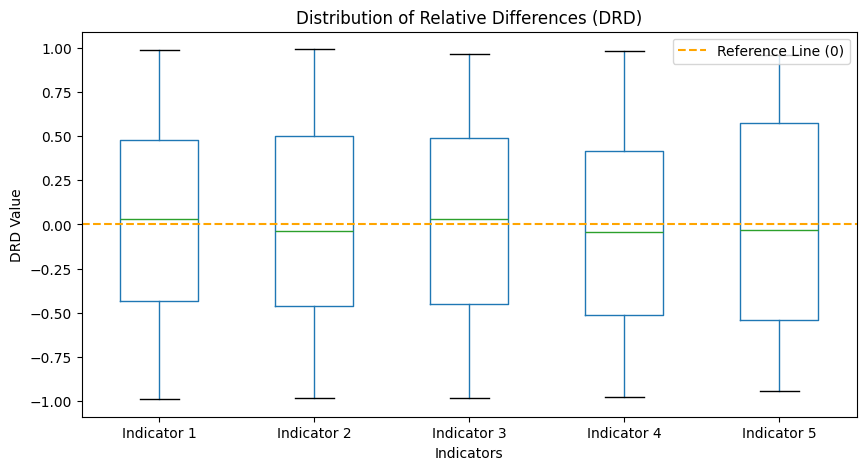

In [10]:
n_simulations = 100  # Number of simulations
k_indicators = 5     # Number of impact indicators

np.random.seed(42)
a1 = np.random.rand(n_simulations, k_indicators) * 10  # Random values for alternative 1
a2 = np.random.rand(n_simulations, k_indicators) * 10  # Random values for alternative 2

# Compute SMD
smd_df = compute_smd(a1, a2)

# Compute DRD
drd_df = compute_drd(a1, a2)

# Display SMD results
from IPython.display import display

# Display SMD results in Jupyter Notebook
print("Standardized Mean Difference (SMD):")
display(smd_df)

plot_drd(drd_df)


**The two alternatives (a1 and a2) do not have a dominant winner.**

**There is variability, meaning for some simulations, a1 performs better, and for others, a2 does.**

**The distribution is wide, indicating uncertainty in performance differences.**

**Some indicators show more variation than others, suggesting that some criteria might be more sensitive to differences between alternatives.**

<Figure size 1000x500 with 0 Axes>

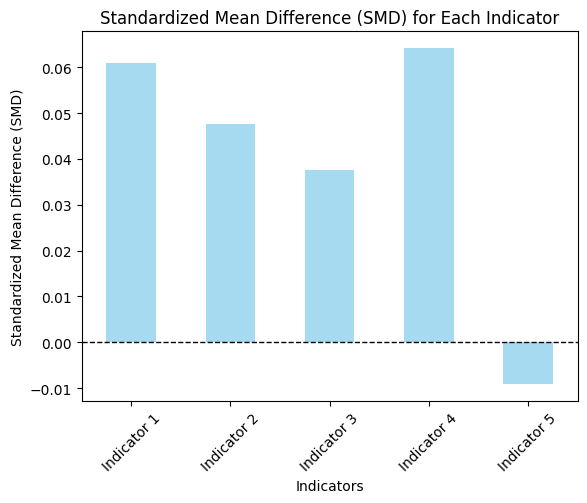

In [11]:
import matplotlib.pyplot as plt

def plot_smd(smd_df):
    """
    Plot the Standardized Mean Difference (SMD) values using a bar chart.
    :param smd_df: DataFrame containing SMD values for each indicator.
    """
    plt.figure(figsize=(10, 5))
    smd_df.plot(kind='bar', legend=False, color='skyblue', alpha=0.75)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0
    plt.ylabel('Standardized Mean Difference (SMD)')
    plt.xlabel('Indicators')
    plt.title('Standardized Mean Difference (SMD) for Each Indicator')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Call the function to plot SMD
plot_smd(smd_df)


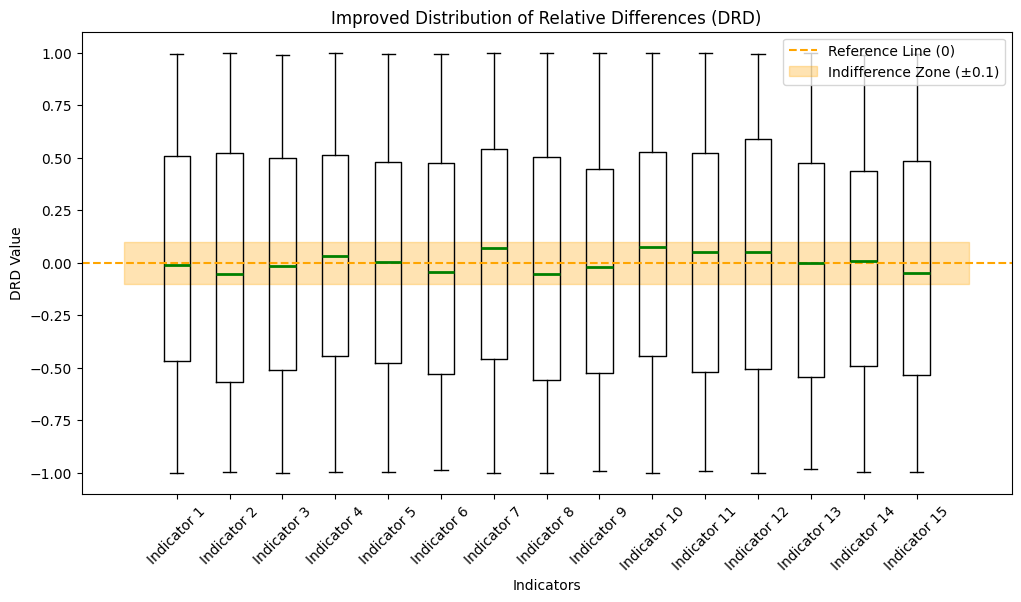

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_drd(a1, a2):
    """
    Compute Distribution of Relative Differences (DRD) for each indicator.
    :param a1: np.array (n_simulations, k_indicators) - First alternative matrix
    :param a2: np.array (n_simulations, k_indicators) - Second alternative matrix
    :return: pd.DataFrame with DRD values
    """
    drd = (a1 - a2) / np.maximum(a1, a2)  # Element-wise operation
    drd_df = pd.DataFrame(drd, columns=[f'Indicator {i+1}' for i in range(a1.shape[1])])
    return drd_df

def plot_drd(drd_df):
    """
    Improved DRD boxplot function.
    :param drd_df: DataFrame containing DRD values for each indicator.
    """
    plt.figure(figsize=(12, 6))

    # Boxplot with thinner lines
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    whiskerprops = dict(linestyle='-', linewidth=1, color='black')
    capprops = dict(linewidth=1)
    medianprops = dict(color="green", linewidth=2)

    drd_df.boxplot(grid=False, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)

    # Add shaded reference region (indifference zone)
    plt.axhline(y=0, color='orange', linestyle='--', linewidth=1.5, label='Reference Line (0)')
    plt.fill_between(x=[0, drd_df.shape[1] + 1], y1=-0.1, y2=0.1, color='orange', alpha=0.3, label='Indifference Zone (±0.1)')

    # Labels and title
    plt.ylabel('DRD Value')
    plt.xlabel('Indicators')
    plt.title('Improved Distribution of Relative Differences (DRD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# ---- Increase Data Size for Better Distribution ----
n_simulations = 500  # Increase the number of simulations
k_indicators = 15    # Increase the number of indicators

np.random.seed(42)
a1 = np.random.rand(n_simulations, k_indicators) * 10  # Random values for alternative 1
a2 = np.random.rand(n_simulations, k_indicators) * 10  # Random values for alternative 2

# Compute DRD with larger dataset
drd_df = compute_drd(a1, a2)

# Plot the improved DRD
plot_drd(drd_df)


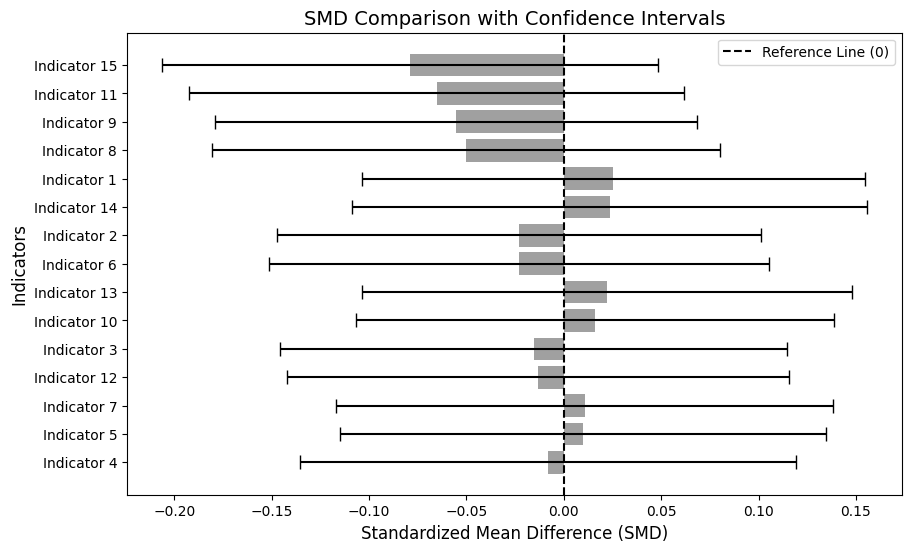

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_smd(a1, a2):
    """
    Compute Standardized Mean Difference (SMD) for each indicator.
    :param a1: np.array (n_simulations, k_indicators) - First alternative matrix
    :param a2: np.array (n_simulations, k_indicators) - Second alternative matrix
    :return: pd.DataFrame with SMD values and standard errors
    """
    mean_diff = np.mean(a1 - a2, axis=0)
    std_diff = np.std(a1 - a2, axis=0, ddof=1)
    smd = mean_diff / std_diff  # Cohen's d for each indicator
    std_error = std_diff / np.sqrt(a1.shape[0])  # Standard error for error bars

    smd_df = pd.DataFrame({'SMD': smd, 'StdError': std_error}, 
                          index=[f'Indicator {i+1}' for i in range(a1.shape[1])])
    return smd_df

def plot_smd(smd_df):
    """
    Improved SMD plot using a horizontal bar chart with confidence intervals.
    :param smd_df: DataFrame containing SMD values and standard errors.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Sort by absolute SMD values for better visualization
    smd_df = smd_df.reindex(smd_df['SMD'].abs().sort_values(ascending=True).index)

    # Define bar colors based on significance
    colors = ['red' if abs(x) > 0.5 else 'grey' for x in smd_df['SMD']]  

    # Plot horizontal bar chart
    ax.barh(smd_df.index, smd_df['SMD'], xerr=smd_df['StdError'], color=colors, capsize=5, alpha=0.75)

    # Add reference line at 0
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5, label='Reference Line (0)')

    # Labels and title
    ax.set_xlabel('Standardized Mean Difference (SMD)', fontsize=12)
    ax.set_ylabel('Indicators', fontsize=12)
    ax.set_title('SMD Comparison with Confidence Intervals', fontsize=14)
    ax.legend(fontsize=10)

    plt.show()

# ---- Increase Data Size for Better Results ----
n_simulations = 1000  # Higher sample size for smooth distributions
k_indicators = 15     # More indicators for better comparison

np.random.seed(42)
a1 = np.random.rand(n_simulations, k_indicators) * 10  # Alternative 1 values
a2 = np.random.rand(n_simulations, k_indicators) * 10  # Alternative 2 values

# Compute SMD
smd_df = compute_smd(a1, a2)

# Plot the improved SMD
plot_smd(smd_df)


✅ No strong evidence that one alternative is consistently better.

✅ Most indicators overlap with 0, meaning no significant difference.

✅ Higher uncertainty (wider error bars) in some indicators, suggesting variability in data.

✅ If decision-making is needed, a more sensitive statistical test or additional data may be required.